In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data =pd.read_csv("cpcb_dly_aq_tamil_nadu-2014.csv")

In [47]:
data.isnull().sum()

# Calculate average SO2, NO2, and RSPM/PM10 levels by City
average_data = data.groupby('City/Town/Village/Area').agg({'SO2': 'mean', 'NO2': 'mean', 'RSPM/PM10': 'mean'}).reset_index()

In [48]:
import warnings
warnings.filterwarnings("ignore")

# Filter the data for a specific location (e.g., a city)
city_data = data[data['City/Town/Village/Area'] == 'Chennai']

# Convert the 'Sampling Date' column to a datetime object
city_data['Sampling Date'] = pd.to_datetime(city_data['Sampling Date'], format='%d-%m-%y')

# Sort the data by date for time series plotting
city_data.sort_values(by='Sampling Date', inplace=True)

# Create a time series plot for SO2 levels

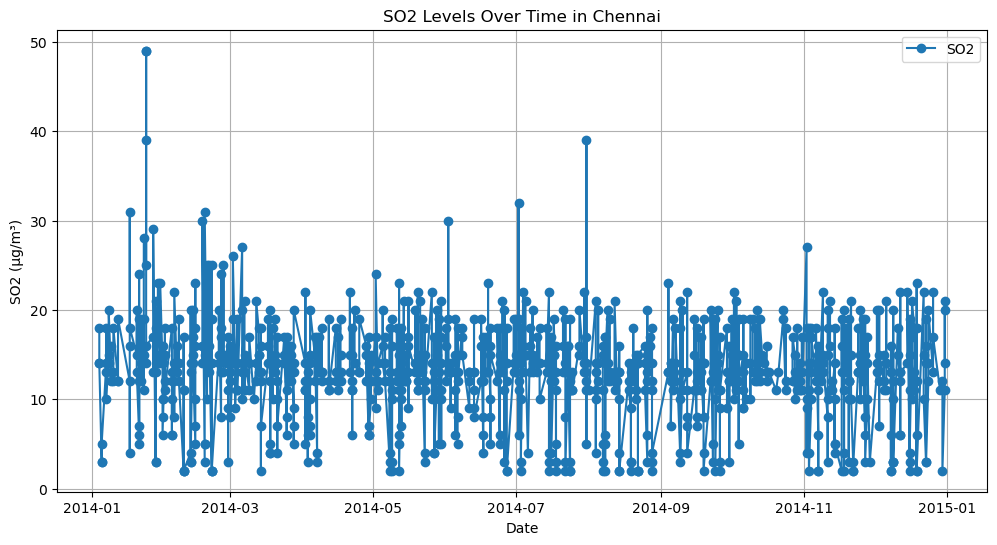

In [49]:

plt.figure(figsize=(12, 6))
plt.plot(city_data['Sampling Date'], city_data['SO2'], label='SO2', marker='o')
plt.xlabel('Date')
plt.ylabel('SO2 (µg/m³)')
plt.title('SO2 Levels Over Time in Chennai')
plt.legend()
plt.grid(True)
plt.show()


# Create a time series plot for NO2 levels

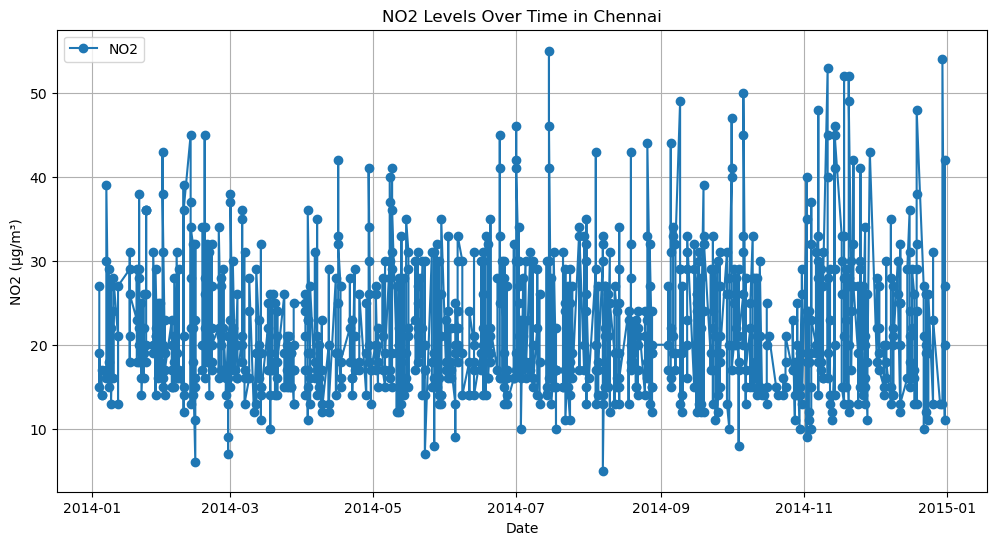

In [50]:

plt.figure(figsize=(12, 6))
plt.plot(city_data['Sampling Date'], city_data['NO2'], label='NO2', marker='o')
plt.xlabel('Date')
plt.ylabel('NO2 (µg/m³)')
plt.title('NO2 Levels Over Time in Chennai')
plt.legend()
plt.grid(True)
plt.show()

# Create a time series plot for RSPM/PM10 levels

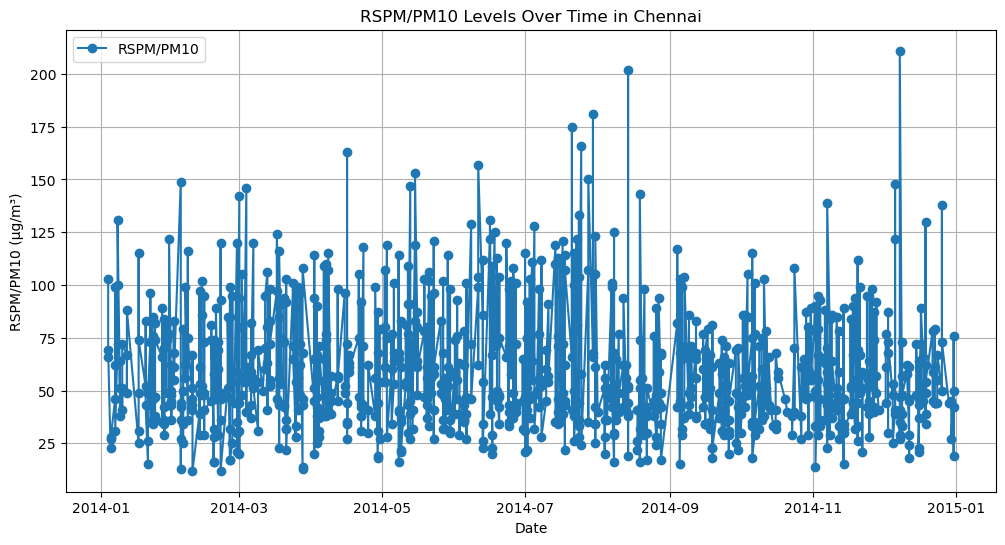

In [51]:

plt.figure(figsize=(12, 6))
plt.plot(city_data['Sampling Date'], city_data['RSPM/PM10'], label='RSPM/PM10', marker='o')
plt.xlabel('Date')
plt.ylabel('RSPM/PM10 (µg/m³)')
plt.title('RSPM/PM10 Levels Over Time in Chennai')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# Load and preprocess data
data = pd.read_csv('cpcb_dly_aq_tamil_nadu-2014.csv')
data['Sampling Date'] = pd.to_datetime(data['Sampling Date'], format='%d-%m-%y')

In [53]:
# Data analysis
average_pollution = data.groupby('City/Town/Village/Area').agg({
    'SO2': 'mean',
    'NO2': 'mean',
    'RSPM/PM10': 'mean'
}).reset_index()

In [54]:
# Identify areas with the highest average pollution levels
highest_pollution_areas = average_pollution.nlargest(5, 'SO2')
print("Areas with the highest SO2 levels:")
print(highest_pollution_areas)

Areas with the highest SO2 levels:
  City/Town/Village/Area        SO2        NO2  RSPM/PM10
7                 Trichy  15.293956  18.695055  85.054496
3                Madurai  13.319728  25.768707  45.724490
0                Chennai  13.014042  22.088442  58.998000
6            Thoothukudi  12.989691  18.512027  83.458904
2              Cuddalore   8.965986  19.710884  61.881757


# Time series analysis

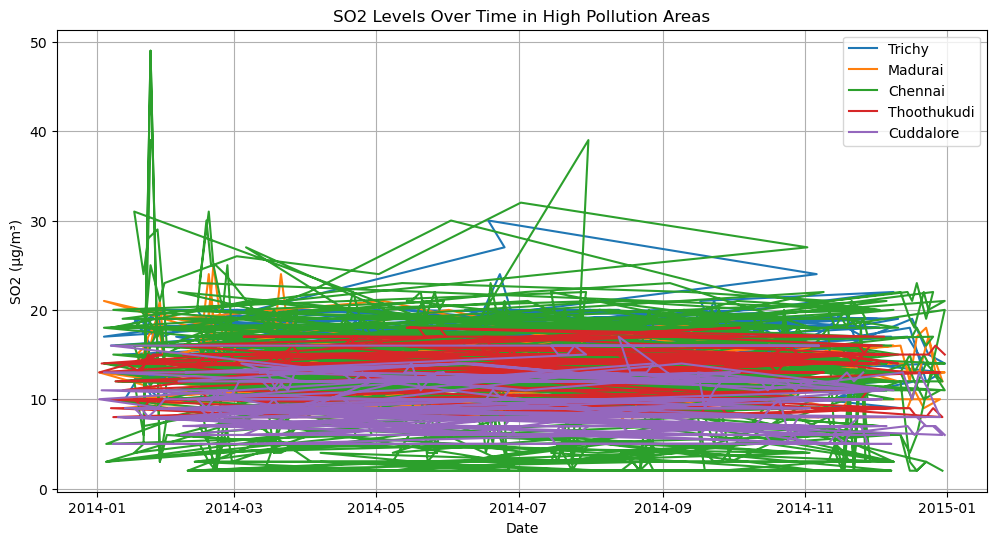

In [55]:

plt.figure(figsize=(12, 6))
for area in highest_pollution_areas['City/Town/Village/Area']:
    area_data = data[data['City/Town/Village/Area'] == area]
    plt.plot(area_data['Sampling Date'], area_data['SO2'], label=area)

plt.title('SO2 Levels Over Time in High Pollution Areas')
plt.xlabel('Date')
plt.ylabel('SO2 (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


# Heatmap to identify high pollution areas

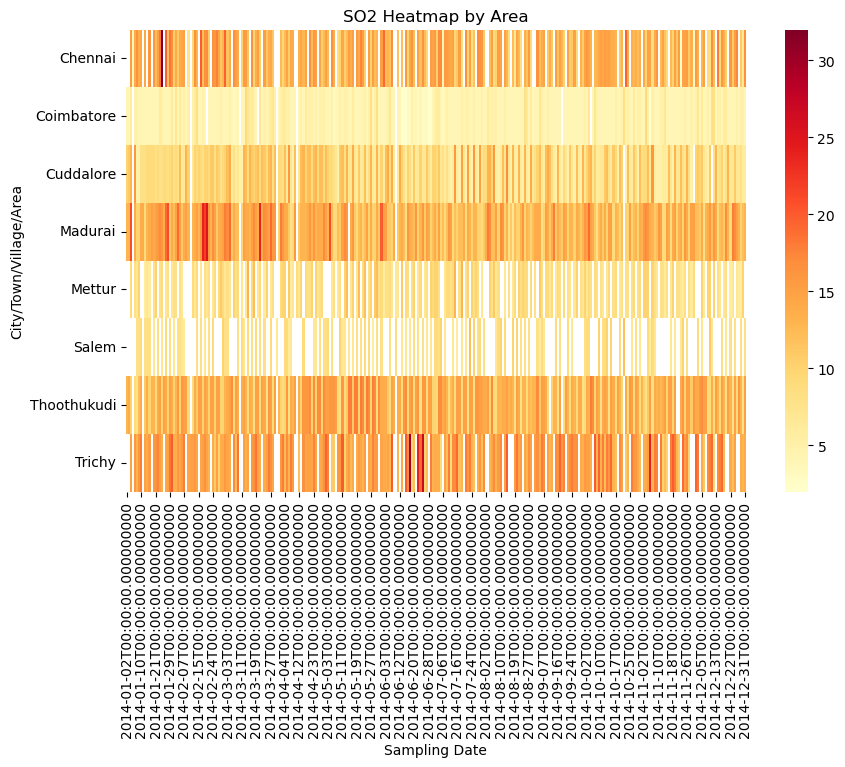

In [56]:

heatmap_data = data.pivot_table(values='SO2', index='City/Town/Village/Area', columns='Sampling Date', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title('SO2 Heatmap by Area')
plt.show()

# Histograms and box plots

Text(0.5, 1.0, 'SO2 Distribution')

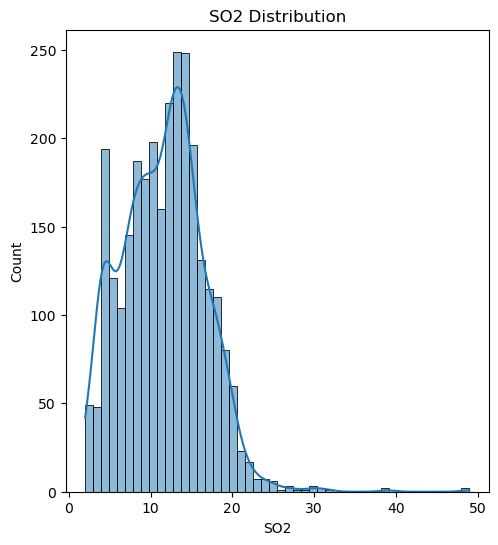

In [57]:

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.histplot(data=data, x='SO2', kde=True)
plt.title('SO2 Distribution')


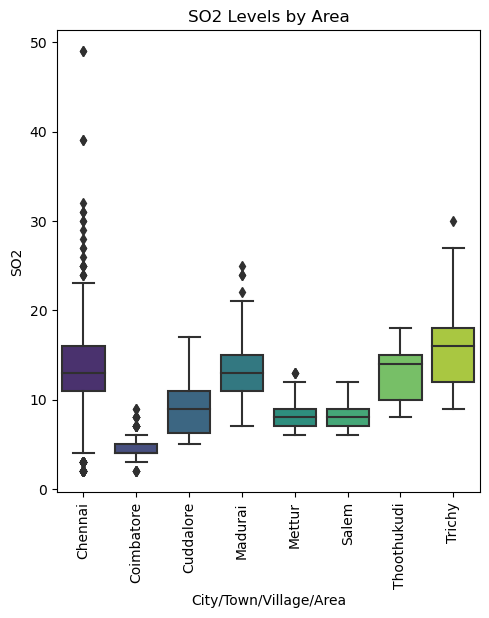

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(122)
sns.boxplot(data=data, x='City/Town/Village/Area', y='SO2', palette='viridis')
plt.title('SO2 Levels by Area')
plt.xticks(rotation=90)
plt.show()

# Create visualizations

# Bar charts for average pollution levels by City

# Average SO2 Levels by City

Text(0.5, 0, 'SO2 (µg/m³)')

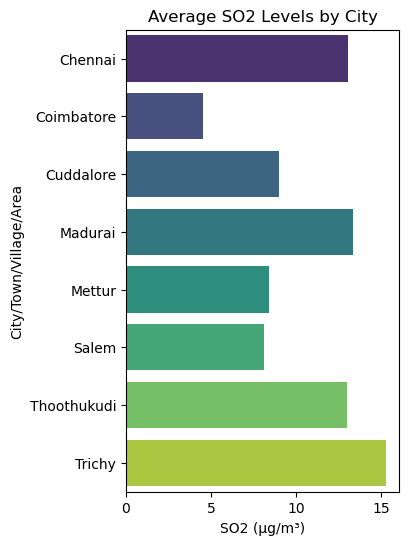

In [59]:

plt.figure(figsize=(12, 6))


plt.subplot(131)
sns.barplot(x='SO2', y='City/Town/Village/Area', data=average_data, palette='viridis')
plt.title('Average SO2 Levels by City')
plt.xlabel('SO2 (µg/m³)')

# Average NO2 Levels by City

Text(0.5, 0, 'NO2 (µg/m³)')

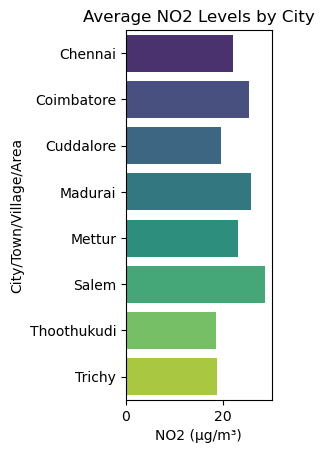

In [60]:
plt.subplot(132)
sns.barplot(x='NO2', y='City/Town/Village/Area', data=average_data, palette='viridis')
plt.title('Average NO2 Levels by City')
plt.xlabel('NO2 (µg/m³)')

# Average RSPM/PM10 Levels by City

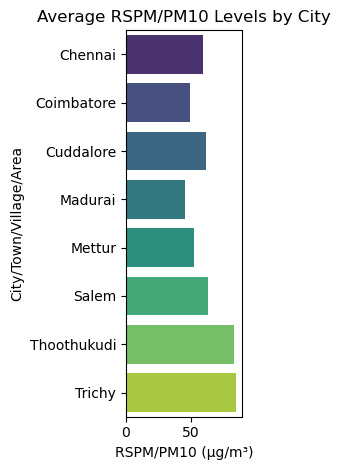

In [61]:
plt.subplot(133)
sns.barplot(x='RSPM/PM10', y='City/Town/Village/Area', data=average_data, palette='viridis')
plt.title('Average RSPM/PM10 Levels by City')
plt.xlabel('RSPM/PM10 (µg/m³)')
plt.tight_layout()
plt.show()

# Correlation Heatmap

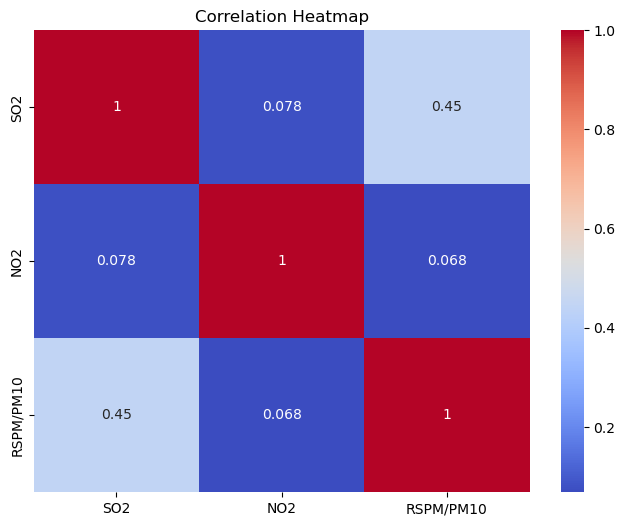

In [62]:
correlation_matrix = data[['SO2', 'NO2', 'RSPM/PM10']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Time Series Trends

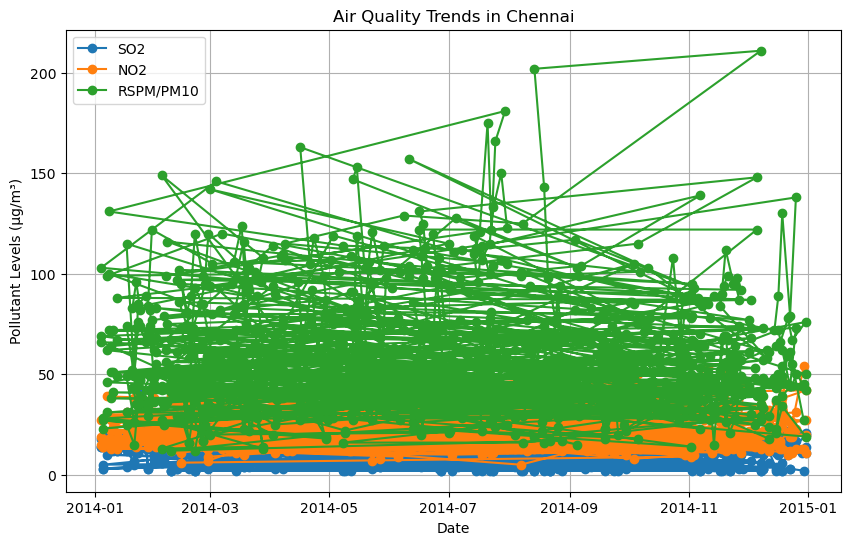

In [63]:
city_name = 'Chennai'  # Replace with the city you're interested in
city_data = data[data['City/Town/Village/Area'] == city_name]

plt.figure(figsize=(10, 6))
plt.plot(city_data['Sampling Date'], city_data['SO2'], label='SO2', marker='o')
plt.plot(city_data['Sampling Date'], city_data['NO2'], label='NO2', marker='o')
plt.plot(city_data['Sampling Date'], city_data['RSPM/PM10'], label='RSPM/PM10', marker='o')
plt.title(f'Air Quality Trends in {city_name}')
plt.xlabel('Date')
plt.ylabel('Pollutant Levels (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

# Histograms with Kernel Density Estimates (KDE)

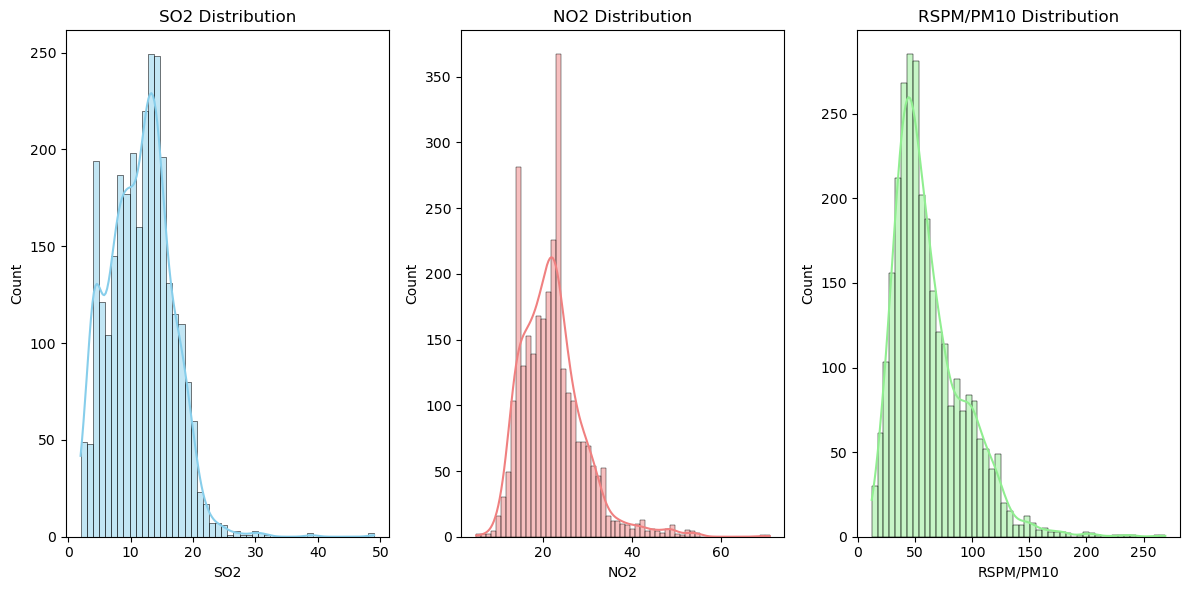

In [64]:
plt.figure(figsize=(12, 6))

# Histogram with KDE for SO2
plt.subplot(131)
sns.histplot(data['SO2'], kde=True, color='skyblue')
plt.title('SO2 Distribution')

# Histogram with KDE for NO2
plt.subplot(132)
sns.histplot(data['NO2'], kde=True, color='lightcoral')
plt.title('NO2 Distribution')

# Histogram with KDE for RSPM/PM10
plt.subplot(133)
sns.histplot(data['RSPM/PM10'], kde=True, color='lightgreen')
plt.title('RSPM/PM10 Distribution')

plt.tight_layout()
plt.show()